# ANALизатор

## Подготовительная часть

### Пакетики оаоаоаоамммм и настройка отображения таблиц

In [55]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Файлы превращаются обратно в датасеты

In [86]:
positions = pd.read_csv("positions 2.csv")
allsongs = pd.read_csv("allsongs.csv")
countries = pd.read_csv("countries 2.csv")
complete = pd.read_csv("complete.csv")

## Непосредственно ANALys аудиоданных (банальная средняя с весом на прослушивания)


###   Функция, которая выводит среднюю с весом на прослушивания

In [57]:
def newmean(playlist, item, length):
    countlist = playlist[['views',item]]
    allviews = countlist.views.sum()
    nmean = sum(countlist[item].loc[i]*countlist.views.loc[i]/allviews for i in range(length))
    return nmean

### Функция которая юзая предыдущую выводит полную сводку аудиоданных
#### Совет от соника: она может работать с показателями любой длины, так что если нашаманить лист из одного жанра и вкинуть ей, она его съест, но надо указать другую длину

In [58]:
def country_audiomean(country, length=50):
    infolist = ['duration_ms', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo']
    playlist = positions.loc[positions['country'] == country] #Вот эта и следующая строка готовят датасет плейлиста, чтобы  работать с жанрами нужно поменять немножечко эти строки
    playlist = pd.merge(playlist,allsongs, how = 'left')
    country_data = {}
    allviews = playlist.views.sum()
    country_data['country'] = country
    country_data['views'] = allviews
    for item in infolist:
        country_data[item] = newmean(playlist,item,length)
    country_data = pd.DataFrame([country_data])
    return country_data

In [59]:
audioglobal = pd.DataFrame()
for i in range(53):
    audioglobal = pd.concat([audioglobal,country_audiomean(countries.country.loc[i])])
audioglobal.reset_index(drop = True)


,country,views,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Global,1096656741,191334.172118,0.639168,0.574471,5.662569,-6.759867,0.652927,0.102684,0.339278,0.000564,0.171413,0.505482,126.717181
1,Australia,45294833,189044.826982,0.648747,0.572762,5.869532,-6.951445,0.723779,0.110251,0.336937,0.001068,0.168440,0.486950,129.502047
2,Austria,5665760,175407.421054,0.707842,0.664870,5.729327,-5.968426,0.605346,0.123010,0.224550,0.004696,0.163121,0.526178,125.933698
3,Argentina,50006172,199404.127621,0.733644,0.642921,5.214050,-5.229765,0.594689,0.126632,0.269337,0.000264,0.156951,0.613767,112.412499
4,Belgium,10342580,187313.587404,0.650502,0.659214,5.461496,-6.159096,0.544600,0.094102,0.247835,0.000630,0.195790,0.525005,126.048224
5,Brazil,159726244,178843.094144,0.675605,0.711800,5.280960,-5.020444,0.554093,0.093716,0.424611,0.000045,0.208241,0.703898,139.474020
6,United Kingdom,77629283,190180.968432,0.649736,0.588717,5.941343,-6.811075,0.661222,0.120682,0.326097,0.000351,0.169545,0.496113,129.867896
7,Hungary,3434081,180338.622690,0.698389,0.669837,5.364670,-5.914031,0.535292,0.102812,0.222042,0.001728,0.178069,0.564036,123.927683
8,Vietnam,8703965,226986.045404,0.670060,0.501670,5.244915,-7.931015,0.730235,0.060402,0.439163,0.015241,0.161367,0.491888,117.193625
9,Guatemala,6989845,207382.952103,0.746674,0.640231,5.292722,-4.949241,0.502118,0.123918,0.280733,0.000334,0.147934,0.622960,118.021758


# Ну че пацаны, визуал


In [60]:
#Просто словарик с кодами стран. Он потом понадобится для построения хороплета. И нет, я составлял его не вручную
codes = {'Australia': 'AUS',
'Austria':'AUT',
'Argentina': 'ARG',
 'Belgium': 'BEL',
 'Brazil': 'BRA',
 'United Kingdom': 'GBR',
 'Hungary': 'HUN',
 'Vietnam': 'VNM',
 'Guatemala': 'GTM',
 'Germany': 'DEU',
 'Hong Kong': 'HKG',
 'Denmark': 'DNK',
 'Dominican Republic': 'DOM',
 'Egypt': 'EGY',
 'Israel': 'ISR',
 'India': 'IND',
 'Indonesia': 'IDN',
 'Ireland': 'IRL',
 'Spain': 'ESP',
 'Italy': 'ITA',
 'Canada': 'CAN',
 'Colombia': 'COL',
 'Malaysia': 'MYS',
 'Morocco': 'MAR',
 'Mexico': 'MEX',
 'Netherlands': 'NLD',
 'New Zealand': 'NZL',
 'Norway': 'NOR',
 'UAE': 'ARE',
 'Panama': 'PAN',
 'Peru': 'PER',
 'Poland': 'POL',
 'South Korea': 'KOR',
 'Russia': 'RUS',
 'Romania': 'ROU',
 'Saudi Arabia': 'SAU',
 'Singapore': 'SGP',
 'Slovakia': 'SVK',
 'USA': 'USA',
 'Thailand': 'THA',
 'Taiwan': 'TWN',
 'Turkey': 'TUR',
 'Ukraine': 'UKR',
 'Philippines': 'PHL',
 'Finland': 'FIN',
 'Czech Republic': 'CZE',
 'Chile': 'CHL',
 'Switzerland': 'CHE',
 'Sweden': 'SWE',
 'Ecuador': 'ECU',
 'South Africa': 'ZAF',
 'Japan': 'JPN'}

In [94]:
#Готовлю свою таблицу для отображения вижуала. global убираю, так как это... ну это не страна
AudioToMap = audioglobal[1:]

# Небольшая функция для добавления колонки с кодами стран
def add_codes(df, codes):
    
    newcolumn = []
    for i in df['country']:
        try:
            newcolumn.append(codes[i])
        except:
            newcolumn.append('-')

    df = df.insert(1, 'CODE', newcolumn)
    
    return df

In [95]:
add_codes(AudioToMap, codes)

### Напишем функцию, рисующую хороплет
на вход она получает характеристику, по которой строить распределение, и датасет, откуда брать данные

In [92]:
def choropleth(feature, audioDF):
    
    fig = go.Figure(data=go.Choropleth(
        locations = audioDF['CODE'],
        z = audioDF[feature],
        text = audioDF['country'],
        colorscale = 'Greens', #если хочется немного hse style, можно установить Rainbow или хотя бы Blues
        autocolorscale=False,
        reversescale= False,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        #colorbar_tickprefix = '$',
        colorbar_title = feature,

    ))

    fig.update_layout(
        #title_text= feature,
        geo=dict(
            #showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )

    '''fig.update_layout(
        autosize=False,
        width=1000,
        height=700,)'''

    fig.show()

In [96]:
choropleth('danceability', AudioToMap)

### А теперь немного корреляции

In [63]:
corrM = audioglobal[['duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']]

<AxesSubplot:>

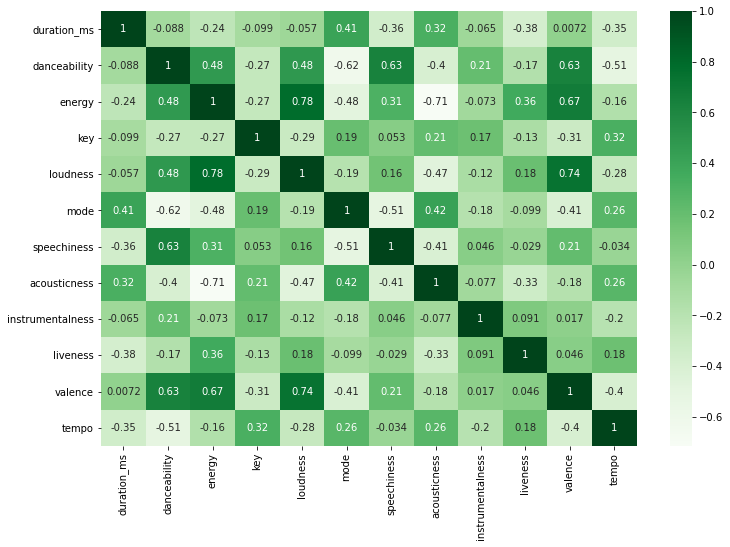

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(corrM.corr(), cmap='Greens', annot=True) #shshhhh... Oh shit hes gonna explode